In [1]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='data/map.png' width='550'></td><td><img src='data/globe.jpeg' width='420'></td></tr></table>"))

,


In [2]:
#!pip install mapclassify
#!pip install geopandas

In [3]:
# load libraries and helper code
from helper_code.countries import *
%matplotlib inline

# Group goal

 
Go through the  analysis below, work on challenges.


**Extra challenge**:

Is there anything else interesting you can find and visualize for this data? 

### Getting data

This dataset was createwd by [Bootstrap](https://www.bootstrapworld.org/index.shtml) company and can be downloaded from  [here](https://docs.google.com/spreadsheets/d/19VoYxPw0tmuSViN1qFIkyUoepjNSRsuQCe0TZZDmrZs/edit#gid=213565368).


Data was aggreagted from the following souces :
 - The World Factbook:
  - [GDP (PPP)](https://www.cia.gov/library/publications/the-world-factbook/rankorder/2001rank.html)
  - [Life expectancy at birth](https://www.cia.gov/library/publications/the-world-factbook/fields/355rank.html)
  - [Population](https://www.cia.gov/library/publications/the-world-factbook/fields/335rank.html)

- Wikipedia:
 - [Universal Health Care](https://en.wikipedia.org/wiki/List_of_countries_with_universal_health_care)
 
    
Some countries/territories/regions were omitted from the data set due to incomplete data.
   

In [4]:
#name of the input file
file_name="data/countries.csv"

In [5]:
#if reading from cloud object storage
target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_d22d1e3f28be45209ba8f660295c84cf/hackaton/countries.csv"
urllib.request.urlretrieve(target_url, file_name)

('data/countries.csv', <http.client.HTTPMessage at 0x119c69d30>)

In [6]:
#reading the input file and creating dataframe
countries = pd.read_csv(file_name) 

In [7]:
#how many rows and colums does the dataframe have?
countries.shape

(150, 6)

In [8]:
#what are the column names?
countries.columns

Index(['country', 'life-expectancy (yrs)', 'gdp ($US)', 'population',
       'continent', 'has-univ-healthcare'],
      dtype='object')

Here are the column description from original sources:  
   
**gdp(\$US)**  - GDP (purchasing power parity) compares the gross domestic product (GDP) or value of all final goods and services produced within a nation in a given year. A nation's GDP at purchasing power parity (PPP) exchange rates is the sum value of all goods and services produced in the country valued at prices prevailing in the United States.

**life-expectancy (yrs)** - Life expectancy at birth compares the average number of years to be lived by a group of people born in the same year, if mortality at each age remains constant in the future. Life expectancy at birth is also a measure of overall quality of life in a country and summarizes the mortality at all ages.

**population** - Population compares estimates from the US Bureau of the Census based on statistics from population censuses, vital statistics registration systems, or sample surveys pertaining to the recent past and on assumptions about future trends.

**has-univ-healthcare** - Universal health coverage is a broad concept that has been implemented in several ways. The common denominator for all such programs is some form of government action aimed at extending access to health care as widely as possible and setting minimum standards.

In [9]:
#display first 5 rows to explore how the data looks like
countries.head()

,country,life-expectancy (yrs),gdp ($US),population,continent,has-univ-healthcare
0,Afghanistan,52.1,69550000000,34940837,Asia,False
1,Angola,60.6,190300000000,30355880,Africa,False
2,Albania,78.6,35970000000,3057220,Europe,False
3,United Arab Emirates,78.7,686800000000,9701315,Asia,False
4,Argentina,77.5,920200000000,44694198,South America,True


In [10]:
#call function get_countries_geometry() defined in helper_code/countries.py
countries2 = get_countries_geometry(countries)

countries2.head()

,geometry,country,life-expectancy (yrs),gdp ($US),population,continent,has-univ-healthcare
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,73.2,8652000000,926276,Oceania,True
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,63.1,162200000000,55451343,Africa,False
2,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,82.0,1769000000000,35881659,North America,True
3,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,80.1,19390000000000,329256465,North America,False
4,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,71.4,477600000000,18744548,Asia,False


### Challenge
- Which additional column was added when calling `get_countries_geometry()` function? What data do you think it has?
- Try experimenting with `head()` function, changinin it to `head(10)` or `head(33)` and see what does it show.


### Exploring data by country

We can just plot all countries that we have using `plot()`  function

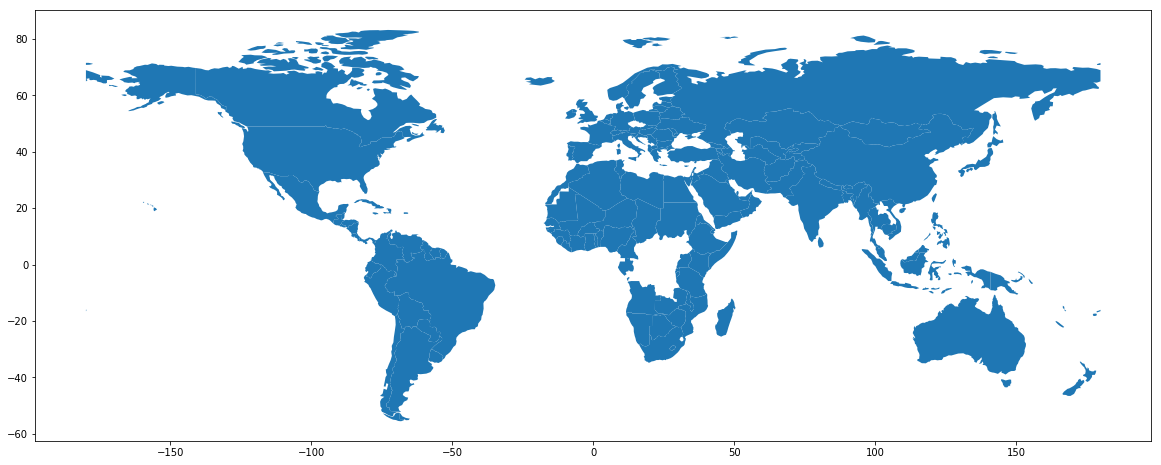

In [53]:
countries2.plot()

Lets try coloring the countries differently depending on the specific column:

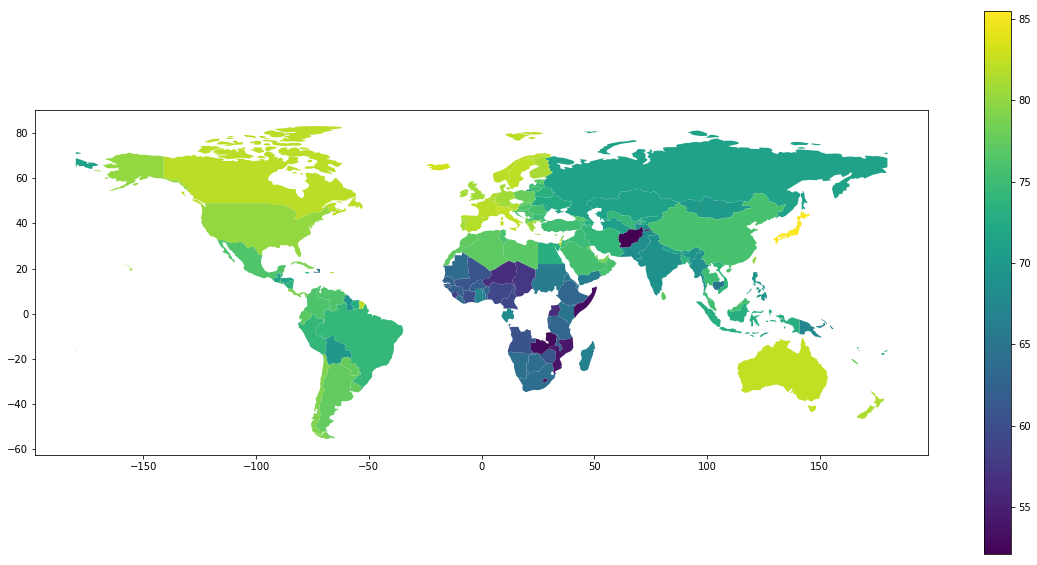

In [55]:
#figure size 18 by 10 
rcParams['figure.figsize'] = 20, 10

#plotting the world map colored by 'population'
countries2.plot(column='life-expectancy (yrs)', legend = True)

Look at the map  - interestingly  - Japan has the highes life expectancy!
Lets find out what is the exact number:

In [56]:
countries2[countries2["country"]=="Japan"]

,geometry,country,life-expectancy (yrs),gdp ($US),population,continent,has-univ-healthcare,gdp ($US) person
136,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",Japan,85.5,5429000000000,126168156,Asia,False,43029.875145


### Challenge
 - Using the cells above as an example - create new cells and draw a map colored by `population` and `gdp ($US)`
 
 - If you look at the colorbar for population  - can you figure out what is `1e9`(on top)?
  - its actually one plus 9 zeros - 1 000 000 000 - one billion - China and India have more than 1 billion popuplation.
 - Print on the screen the exact number for China population.
  
- If you look at both maps you created - do they look similar? Why do you think it happens?

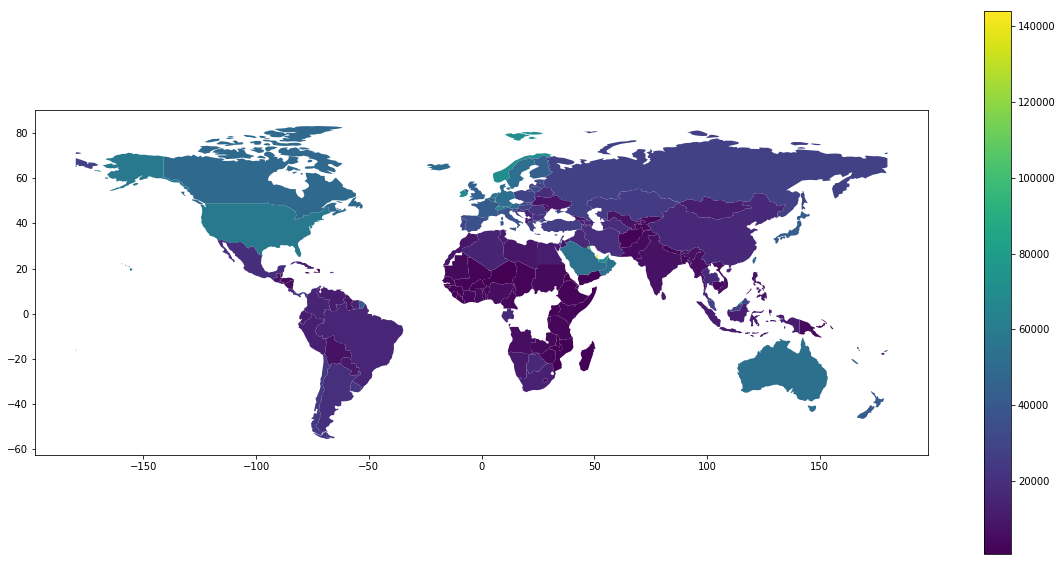

In [57]:
#let's create another column - GDP per person
countries2['gdp ($US) person'] = countries2['gdp ($US)']/countries2["population"]

#and plot by new created column
rcParams['figure.figsize'] = 20, 10
countries2.plot(column='gdp ($US) person',legend = True)

Interestingly, now Canada is among the leaders too.  
Lets find out the top 20 countries having the highest `gdp ($US) person` value.   
We are going to do this using **sort_values()** function.

In [60]:
#select only two columns - "gdp ($US) person" and "country"
gdp_person = countries2[["gdp ($US) person","country"]]

#order by "gdp ($US) person", having highest numbers on top and get top 20
#note ascending is set to False, try chaning it to true and see what heppens
gdp_person = gdp_person.sort_values("gdp ($US) person", ascending = False).head(20)

gdp_person

,gdp ($US) person,country
72,144104.106967,Qatar
111,103555.179905,Luxembourg
73,99949.699414,Kuwait
131,74439.869941,Brunei
71,70794.526309,United Arab Emirates
16,70734.640671,Norway
116,70480.756899,Ireland
110,62367.287128,Switzerland
3,58890.263552,United States of America
139,53609.559763,Saudi Arabia


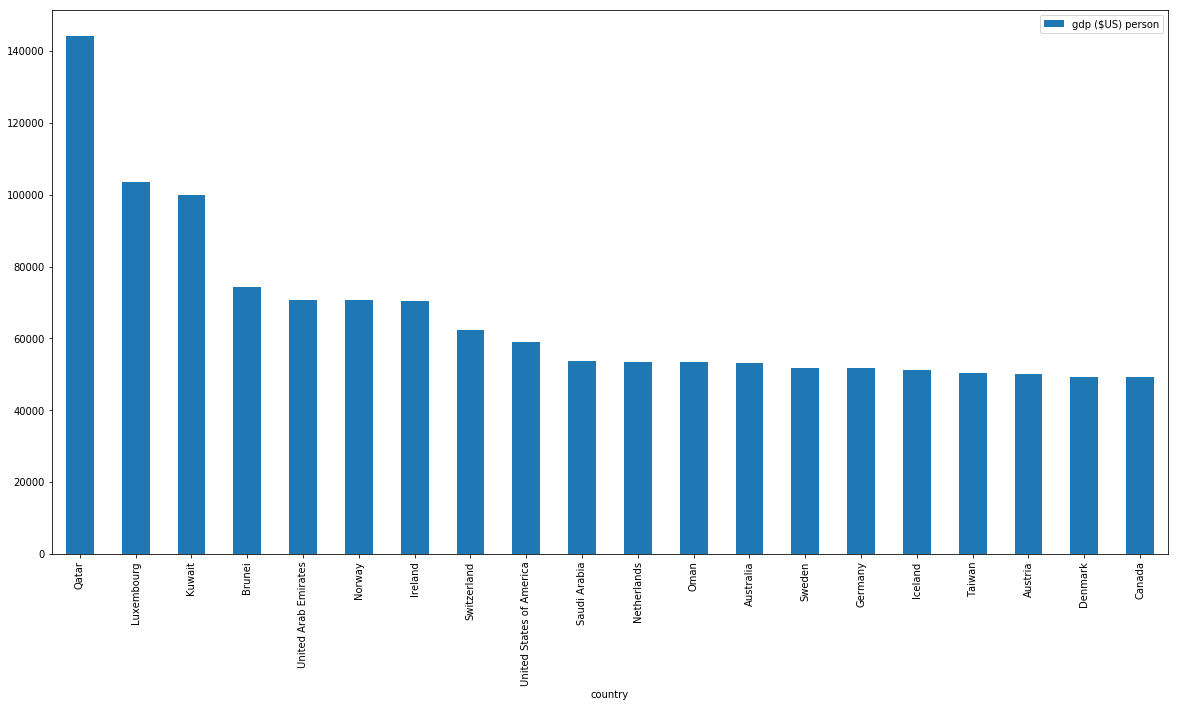

In [68]:
#plotting top 20 countries, setting index to country - so the bars are marked with country names
gdp_person.set_index("country").plot(kind = "bar")

Looks like some of the countries in the top 20 are quite small - like Luxembourg or Brunei.   
Let's try repeating the same steps but with  additonal column - "popupation":

In [88]:
# creating new column  - population in thousands:
countries2["population_tsn"] = countries2["population"]/1000

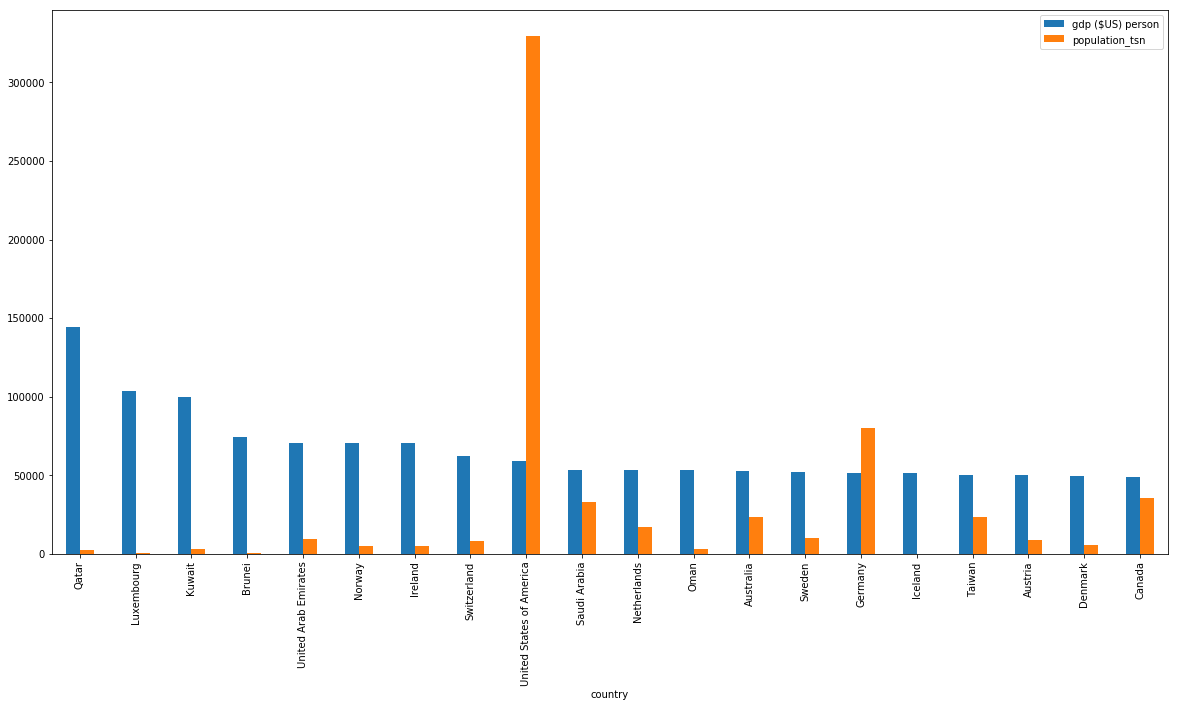

In [89]:
#this time we select 3 columns - "gdp ($US) person", "population_tsn" and "country"
gdp_person = countries2[["gdp ($US) person","population_tsn" ,"country"]]

#sorting again  by "gdp ($US) person"
gdp_person = gdp_person.sort_values("gdp ($US) person", ascending = False).head(20)

gdp_person.set_index("country").plot(kind = "bar")

### Challenge
 - Using the cells above as an example - find out the top 20 countriest with least life expectancy.
 - Do these countries have Universal Health Care?

### Exploring data by continent

In [15]:
countries2["continent"].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe'], dtype=object)

In [ ]:
#cmap='cubehelix'
#cmap='Greens'
#cmap='winter'
#countries2.plot(column='population', cmap = 'YlGnBu',scheme='quantiles',k=20, figsize=(20,10), legend = True)

To be continued